In [3]:
import os
import sys
import operator
import numpy as np
import pandas as pd
from scipy import sparse
import xgboost as xgb
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
from sklearn.cluster import KMeans

In [6]:
from scipy.spatial.distance import cdist

In [7]:
data_path = "./"
train_file = data_path + "train.csv"
test_file = data_path + "test.csv"
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
print(train_df.shape)
print(test_df.shape)

(30471, 292)
(7662, 291)


In [8]:
macro_file = data_path + "macro.csv"
macro_df = pd.read_csv(macro_file)

In [9]:
macro_df.shape

(1746, 99)

In [10]:
macro_df_final = macro_df.fillna(macro_df.mean())

In [20]:
macro_df_final["old_education_build_share"]

0       29126.0
1       29126.0
2       29126.0
3       29126.0
4       29126.0
5       29126.0
6       29126.0
7       29126.0
8       29126.0
9       29126.0
10      29126.0
11      29126.0
12      29126.0
13      29126.0
14      29126.0
15      29126.0
16      29126.0
17      29126.0
18      29126.0
19      29126.0
20      29126.0
21      29126.0
22      29126.0
23      29126.0
24      29126.0
25      29126.0
26      29126.0
27      29126.0
28      29126.0
29      29126.0
         ...   
1716    29126.0
1717    29126.0
1718    29126.0
1719    29126.0
1720    29126.0
1721    29126.0
1722    29126.0
1723    29126.0
1724    29126.0
1725    29126.0
1726    29126.0
1727    29126.0
1728    29126.0
1729    29126.0
1730    29126.0
1731    29126.0
1732    29126.0
1733    29126.0
1734    29126.0
1735    29126.0
1736    29126.0
1737    29126.0
1738    29126.0
1739    29126.0
1740    29126.0
1741    29126.0
1742    29126.0
1743    29126.0
1744    29126.0
1745    29126.0
Name: old_education_buil

In [11]:
macro_matrix = macro_df_final.as_matrix()

In [12]:
macro_matrix

array([[  1.09310000e+02,   1.43137000e+04,   3.30000000e+00, ...,
          6.41200000e+01,   2.35870000e+04,   2.30310000e+05],
       [  1.09310000e+02,   1.43137000e+04,   3.30000000e+00, ...,
          6.41200000e+01,   2.35870000e+04,   2.30310000e+05],
       [  1.09310000e+02,   1.43137000e+04,   3.30000000e+00, ...,
          6.41200000e+01,   2.35870000e+04,   2.30310000e+05],
       ..., 
       [  4.50185000e+01,   1.85613000e+04,  -1.20000000e+00, ...,
          7.07955838e+01,   4.26601659e+04,   2.30659240e+05],
       [  4.50185000e+01,   1.85613000e+04,  -1.20000000e+00, ...,
          7.07955838e+01,   4.26601659e+04,   2.30659240e+05],
       [  4.50185000e+01,   1.85613000e+04,  -1.20000000e+00, ...,
          7.07955838e+01,   4.26601659e+04,   2.30659240e+05]])

In [13]:
macro_matrix_scaled = preprocessing.scale(macro_matrix)

In [14]:
macro_matrix_scaled

array([[  7.17336881e-01,  -1.87558566e+00,   8.13272670e-01, ...,
         -1.98194755e+00,  -3.30939623e+00,  -1.16087486e-01],
       [  7.17336881e-01,  -1.87558566e+00,   8.13272670e-01, ...,
         -1.98194755e+00,  -3.30939623e+00,  -1.16087486e-01],
       [  7.17336881e-01,  -1.87558566e+00,   8.13272670e-01, ...,
         -1.98194755e+00,  -3.30939623e+00,  -1.16087486e-01],
       ..., 
       [ -1.50818694e+00,   1.73442857e-01,  -7.38724651e-01, ...,
         -2.32052256e-13,   0.00000000e+00,  -3.86964619e-14],
       [ -1.50818694e+00,   1.73442857e-01,  -7.38724651e-01, ...,
         -2.32052256e-13,   0.00000000e+00,  -3.86964619e-14],
       [ -1.50818694e+00,   1.73442857e-01,  -7.38724651e-01, ...,
         -2.32052256e-13,   0.00000000e+00,  -3.86964619e-14]])

NameError: name 'font' is not defined

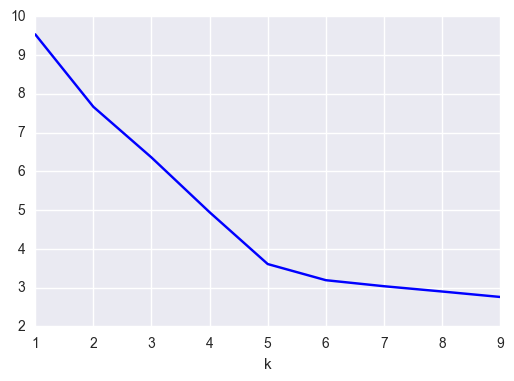

In [26]:
K=range(1,10)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(macro_matrix_scaled)
    meandistortions.append(sum(np.min(cdist(
            macro_matrix_scaled,kmeans.cluster_centers_,"euclidean"),axis=1))/macro_matrix_scaled.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel(u'平均畸变程度',fontproperties=font)
plt.title(u'用肘部法则来确定最佳的K值',fontproperties=font)

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(macro_matrix_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
macro_df_final['label'] = kmeans.labels_

In [34]:
macro_df_final.to_csv('temp.csv', index=False)